In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import boxcox
from scipy.stats import norm
import seaborn as sns


In [ ]:
def get_lead_time(purchase_quantity):
    threshold = 5
    if purchase_quantity<=threshold:
        return threshold
    return round(threshold+2*purchase_quantity/threshold)

def randomize_and_normalize(purchase_quantities, normalization_scale):
    # Apply Box-Cox transformation
    transformed_quantities, _ = boxcox(purchase_quantities)

    # Calculate mean and standard deviation of the transformed quantities
    mean_value = np.mean(transformed_quantities)
    standard_deviation = np.std(transformed_quantities)

    # Generate randomized quantities from a normal distribution
    randomized = np.random.normal(mean_value, standard_deviation, len(purchase_quantities))

    # Normalize quantities based on the first randomized value
    new_quantities = [round(quant * normalization_scale / randomized[0]) for quant in randomized]
    mean, std_dev = norm.fit(new_quantities)
    print("Estimated Mean:", mean)
    print("Estimated Standard Deviation:", std_dev)
    return new_quantities


df = pd.read_excel("./forcasting_data.xlsx",sheet_name="4. Ranked purchasing decisions")
df = df[['Name', 'Lead time, days', 'Purchase order qty', 'Demand probability, %']]
df = df[df["Name"]=="Keyboard"]
df["Purchase order qty"] = range(1,len(df)+1)
df["Purchase order qty"] = randomize_and_normalize(df["Purchase order qty"],20)
df["Lead time, days"] =df["Purchase order qty"].apply(lambda x:get_lead_time(x))
dates=pd.date_range(start='2020-01-01', end='2021-01-01')
df["Date"] = dates[:len(df)]
display(df)


In [16]:
#Read supply_chain_data
supply_chain_data_df = pd.read_csv("./supply_chain_data.csv")
supply_chain_data_df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


100
(40, 6)


,Product type,Stock levels,Demand,Order quantities,Lead time,Price
0,skincare,53,736,37,23,14.843523
1,skincare,23,83,59,24,61.163343
2,skincare,5,871,56,5,4.805496
3,skincare,11,65,58,14,4.078333
4,skincare,14,980,83,29,64.015733
5,skincare,51,996,80,18,15.707796
6,skincare,46,960,60,28,90.635460
7,skincare,80,249,48,23,16.160393
8,skincare,54,562,78,25,99.171329
9,skincare,9,469,69,14,36.989245


,Product type,Stock levels,Demand,Order quantities,Lead time,Price,current stock
0,skincare,53,736,37,23,14.843523,752
1,skincare,23,83,59,24,61.163343,47
2,skincare,5,871,56,5,4.805496,820
3,skincare,11,65,58,14,4.078333,18
4,skincare,14,980,83,29,64.015733,911
5,skincare,51,996,80,18,15.707796,967
6,skincare,46,960,60,28,90.635460,946
7,skincare,80,249,48,23,16.160393,281
8,skincare,54,562,78,25,99.171329,538
9,skincare,9,469,69,14,36.989245,409


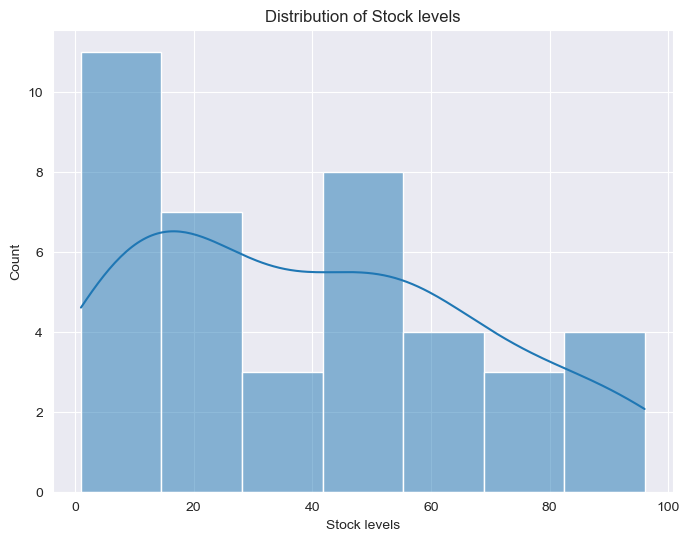

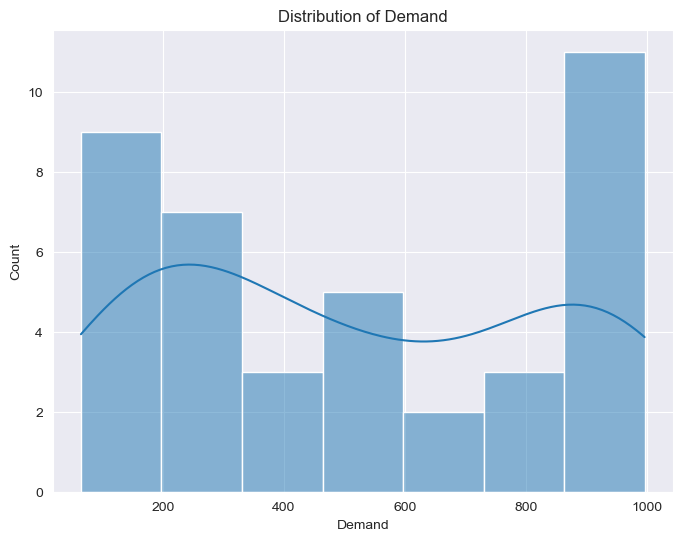

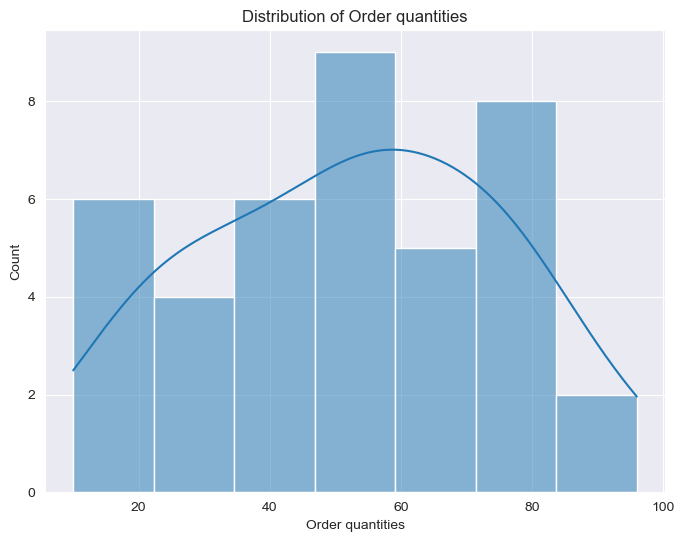

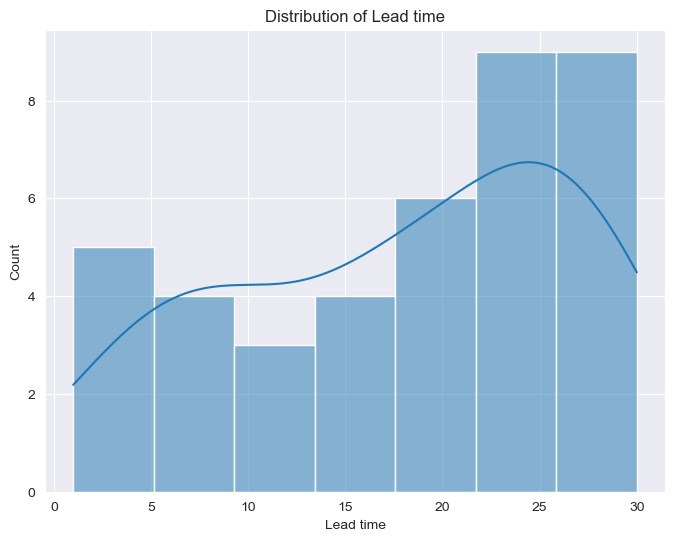

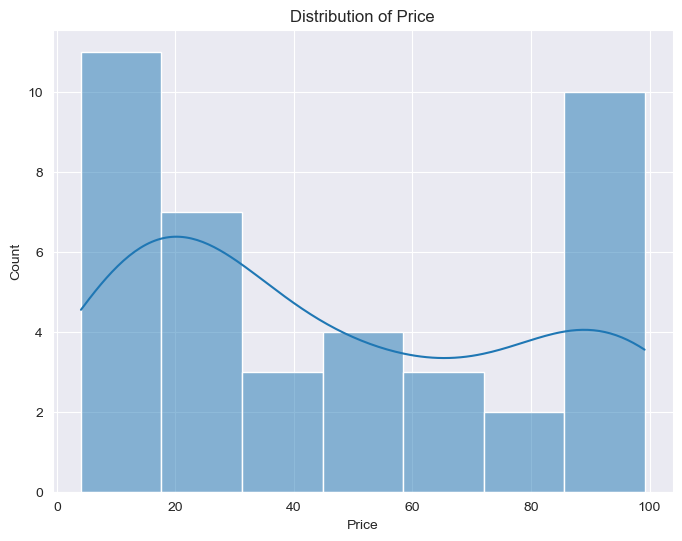

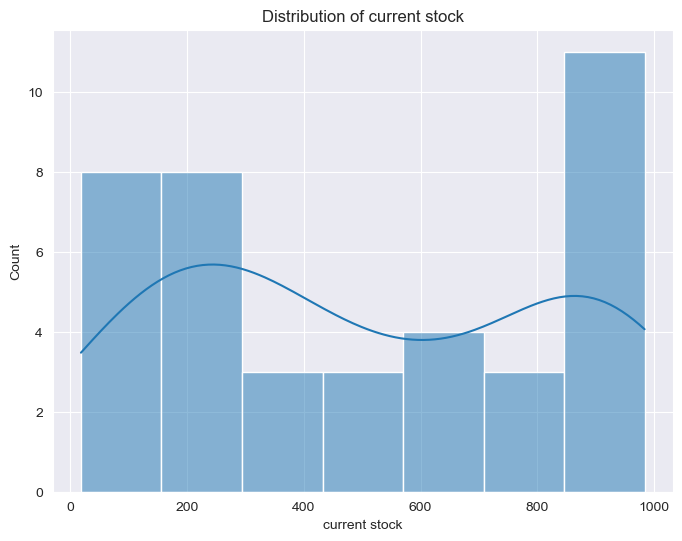

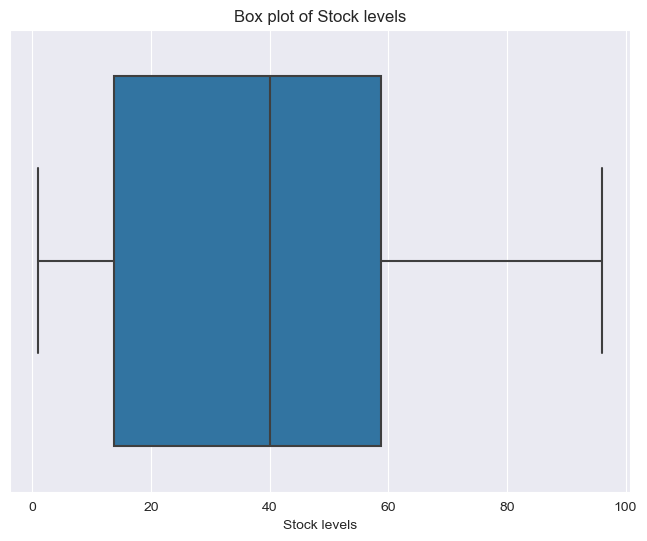

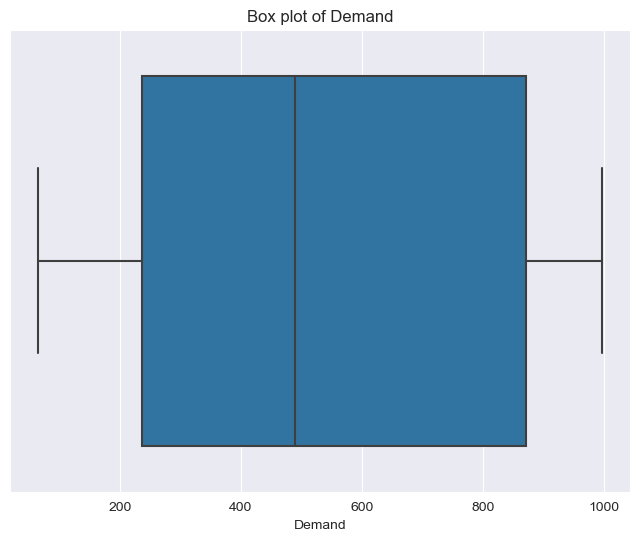

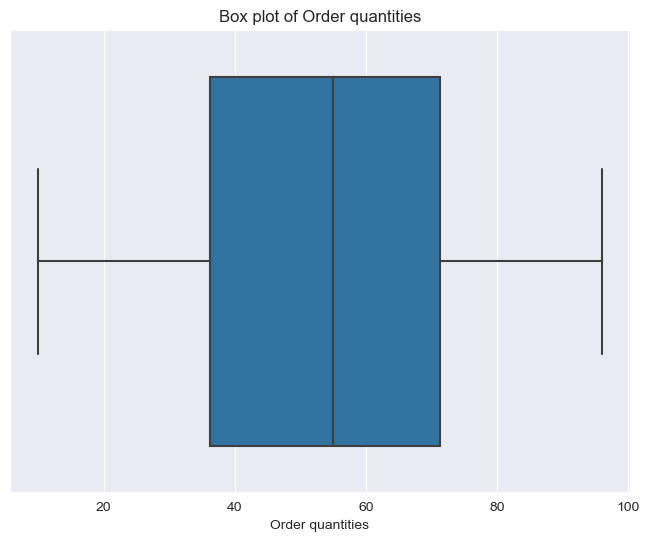

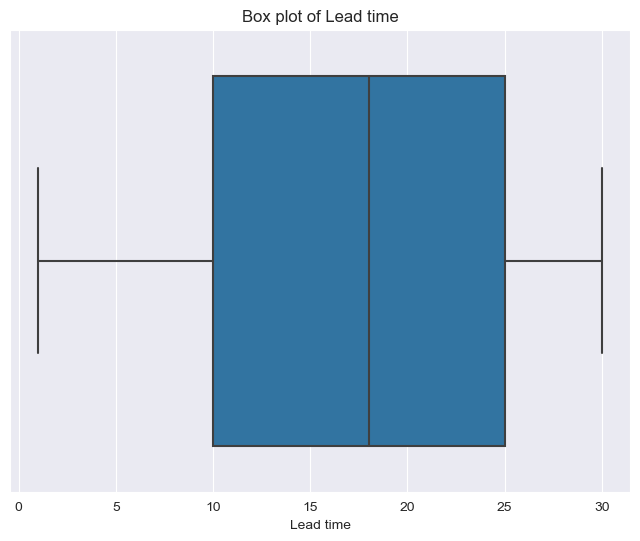

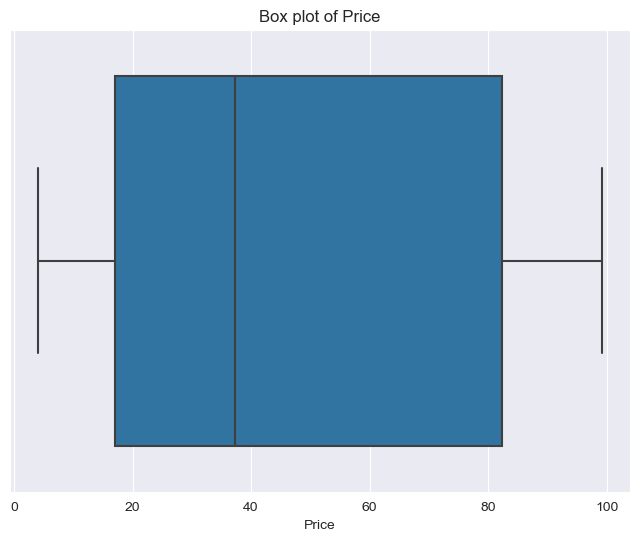

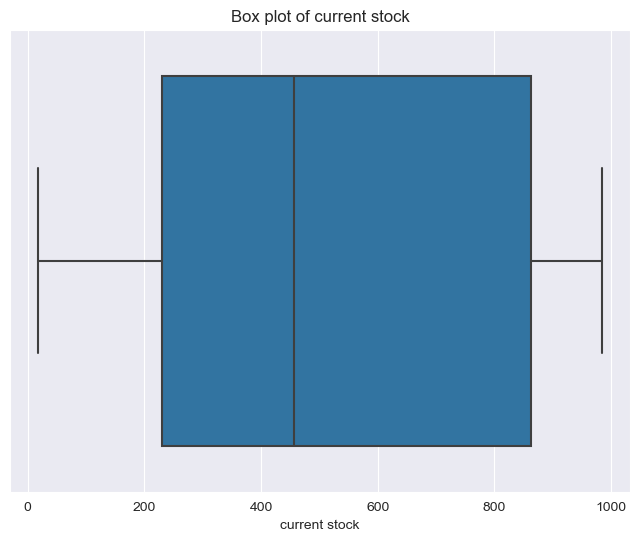

In [24]:
supply_chain_data_copy = supply_chain_data_df.copy()
print(len(supply_chain_data_copy))
supply_chain_data_groups = supply_chain_data_copy.groupby("Product type")
# Calculate the size of each group
group_sizes = supply_chain_data_groups.size()

# Find the product type with the largest group
largest_group_product_type = group_sizes.idxmax()
# Get the largest group's data
largest_group_data = supply_chain_data_copy[supply_chain_data_copy["Product type"] == largest_group_product_type].reset_index()
largest_group_data_filtered = largest_group_data[['Product type','Number of products sold','Stock levels','Lead time', 'Price', 'Order quantities']]

# Create a copy of the subset
largest_group_data_filtered_copy = largest_group_data_filtered.copy()

# Calculate the demand and assign it to the copy
largest_group_data_filtered_copy["Demand"] = largest_group_data_filtered_copy["Number of products sold"]
largest_group_data_filtered_copy = largest_group_data_filtered_copy.copy()[['Product type','Stock levels','Demand','Order quantities','Lead time', 'Price']]


def visualize(df):

# Histograms
    for column in df.columns:
        if type(df[column][0]).__name__ == 'str':
            continue
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.show()
    #
    # Box plots
    for column in df.columns:
        if type(df[column][0]).__name__ == 'str':
            continue
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f'Box plot of {column}')
        plt.show()
print(largest_group_data_filtered_copy.shape)
display(largest_group_data_filtered_copy)
"""
demand=736
ordered=37
stock=53
how_stock_was=demand +stock - order_quantity
"""
def get_current_stock(row):
    return row["Demand"] + row["Stock levels"]-row["Order quantities"]
largest_group_data_filtered_copy["current stock"] = largest_group_data_filtered_copy.apply(lambda row:get_current_stock(row),axis=1)

display(largest_group_data_filtered_copy)
visualize(largest_group_data_filtered_copy)
# visualize(largest_group_data_filtered_copy)



In [ ]:
import statsmodels.api as sm

for column in largest_group_data_filtered_copy.columns[1:]:
    sm.qqplot(largest_group_data_filtered_copy[column], line='s')
    plt.title(f'Q-Q plot of {column}')
    plt.show()


In [21]:
from scipy.stats import shapiro, skew, kurtosis
def do_data_analysis(df):
    data_and_distribution_dict = {}

    for column in df.columns:
        if type(df[column][0]).__name__ == 'str':
            continue
        # Statistical Tests
        _, shapiro_p_value = shapiro(df[column])
        skew_value = skew(df[column])
        kurt_value = kurtosis(df[column])

        print(f"Shapiro-Wilk test p-value for {column}: {shapiro_p_value:.4f}")
        print(f"Skewness for {column}: {skew_value:.4f}")
        print(f"Kurtosis for {column}: {kurt_value:.4f}")

        # Interpretation
        distribution = ""
        if shapiro_p_value > 0.05:
            print(f"{column} appears to be normally distributed.")
            distribution = 'normal'
        else:
            if skew_value > 0:
                print(f"{column} is right-skewed.")
                distribution = 'right-skewed'
            elif skew_value < 0:
                print(f"{column} is left-skewed.")
                distribution = 'left-skewed'
            else:
                print(f"{column} has an unknown skewness.")

            if kurt_value > 0:
                print(f"{column} has positive kurtosis (leptokurtic).")
            elif kurt_value < 0:
                print(f"{column} has negative kurtosis (platykurtic).")
            else:
                print(f"{column} has mesokurtic kurtosis (similar to a normal distribution).")

        # Update the dictionary
        data_and_distribution_dict[column] = {"data": df[column].values, "distribution": distribution}
        print("-" * 50)
    return data_and_distribution_dict
data_and_distribution_dict = do_data_analysis(largest_group_data_filtered_copy)

Shapiro-Wilk test p-value for Stock levels: 0.0230
Skewness for Stock levels: 0.3884
Kurtosis for Stock levels: -0.9983
Stock levels is right-skewed.
Stock levels has negative kurtosis (platykurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Demand: 0.0015
Skewness for Demand: 0.1530
Kurtosis for Demand: -1.5003
Demand is right-skewed.
Demand has negative kurtosis (platykurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Order quantities: 0.4613
Skewness for Order quantities: -0.0714
Kurtosis for Order quantities: -0.9173
Order quantities appears to be normally distributed.
--------------------------------------------------
Shapiro-Wilk test p-value for Lead time: 0.0113
Skewness for Lead time: -0.3625
Kurtosis for Lead time: -1.1571
Lead time is left-skewed.
Lead time has negative kurtosis (platykurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Price: 0.0004
Skewness fo

,Stock levels,Demand,Order quantities,Lead time,Price,current stock
0,52,834,115,156,59,771
1,76,684,113,131,153,647
2,65,1435,23,112,175,1477
3,93,601,23,69,56,671
4,65,1214,116,97,64,1163
...,...,...,...,...,...,...
360,98,1048,39,79,93,1107
361,46,725,52,28,89,719
362,47,1011,78,126,68,980
363,254,787,40,62,55,1001


Shapiro-Wilk test p-value for Stock levels: 0.0000
Skewness for Stock levels: 5.6841
Kurtosis for Stock levels: 45.7567
Stock levels is right-skewed.
Stock levels has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Demand: 0.0000
Skewness for Demand: 6.3986
Kurtosis for Demand: 50.8621
Demand is right-skewed.
Demand has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Order quantities: 0.4881
Skewness for Order quantities: -0.0188
Kurtosis for Order quantities: 0.0479
Order quantities appears to be normally distributed.
--------------------------------------------------
Shapiro-Wilk test p-value for Lead time: 0.0000
Skewness for Lead time: -0.8333
Kurtosis for Lead time: 0.4147
Lead time is left-skewed.
Lead time has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Price: 0.0000
Skewness for 

,Stock levels,Demand,Lead time,Price,Order quantities,current stock
0,51,786,173,62,53.0,784.0
1,214,692,105,69,0.0,906.0
2,52,783,118,77,0.0,835.0
3,82,2262,181,149,0.0,2344.0
4,275,797,132,61,0.0,1072.0
...,...,...,...,...,...,...
360,57,746,93,72,53.0,750.0
361,85,1359,141,62,0.0,1444.0
362,76,626,69,50,0.0,702.0
363,98,1778,104,67,0.0,1876.0


Shapiro-Wilk test p-value for Stock levels: 0.0000
Skewness for Stock levels: 3.6582
Kurtosis for Stock levels: 20.2733
Stock levels is right-skewed.
Stock levels has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Demand: 0.0000
Skewness for Demand: 3.1694
Kurtosis for Demand: 11.6484
Demand is right-skewed.
Demand has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Lead time: 0.0000
Skewness for Lead time: -0.8575
Kurtosis for Lead time: 0.5332
Lead time is left-skewed.
Lead time has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Price: 0.0000
Skewness for Price: 4.2869
Kurtosis for Price: 25.7098
Price is right-skewed.
Price has positive kurtosis (leptokurtic).
--------------------------------------------------
Shapiro-Wilk test p-value for Order quantities: 0.0000
Skewness for Order qua

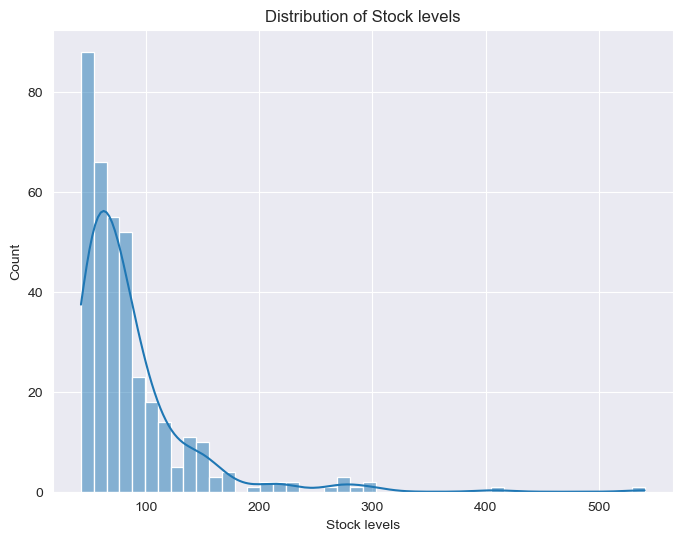

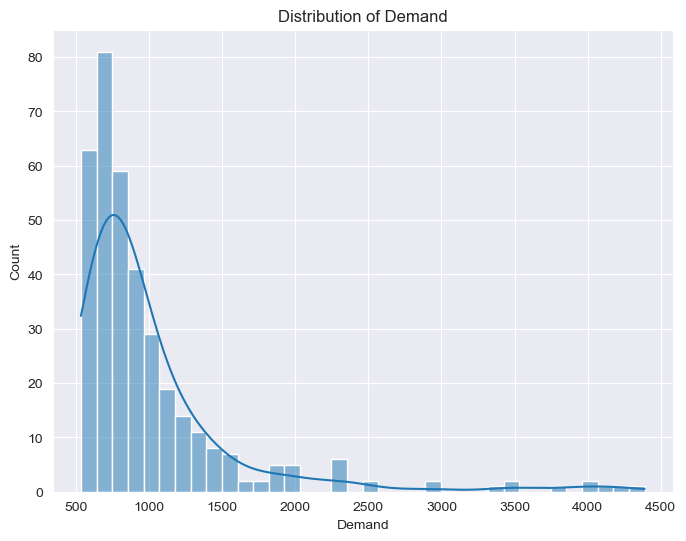

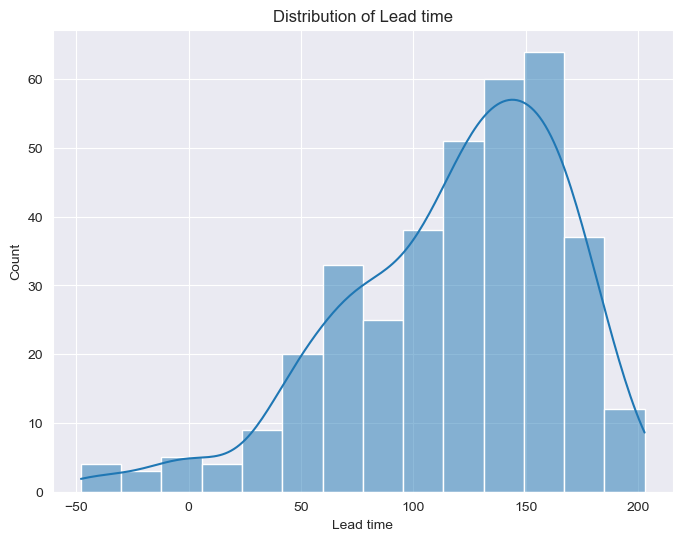

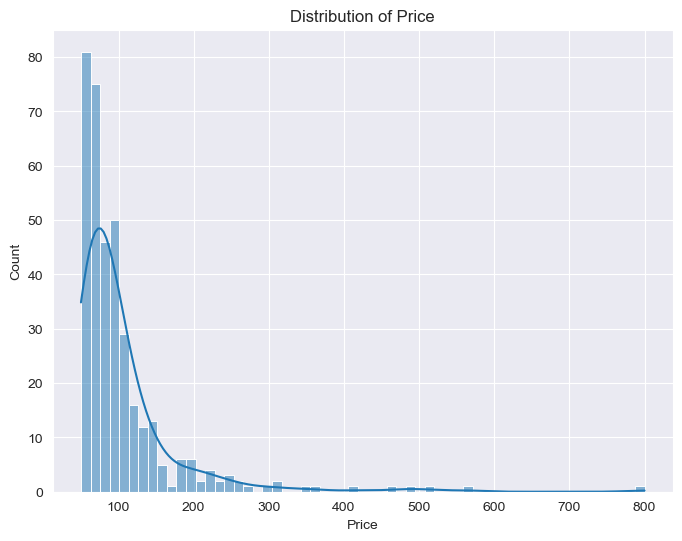

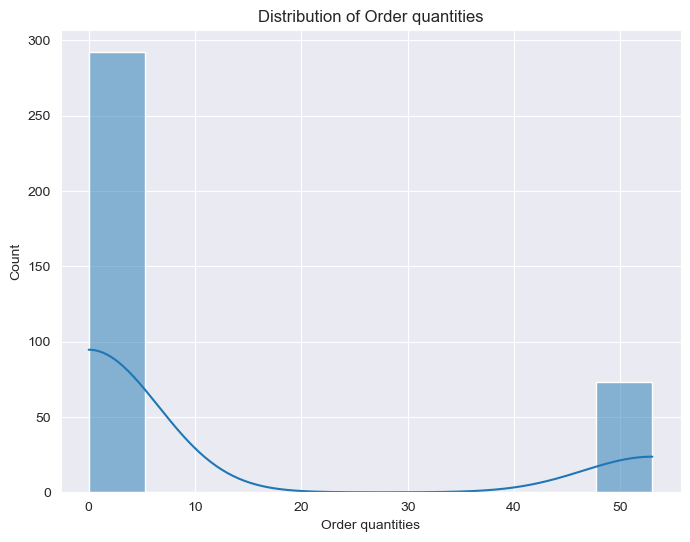

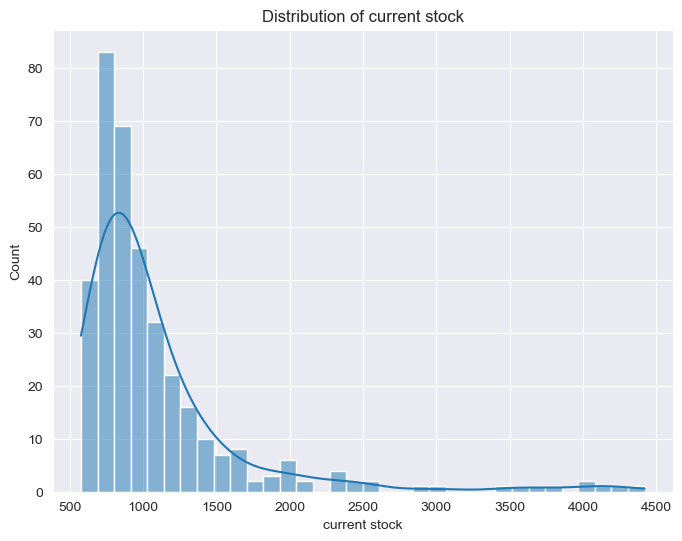

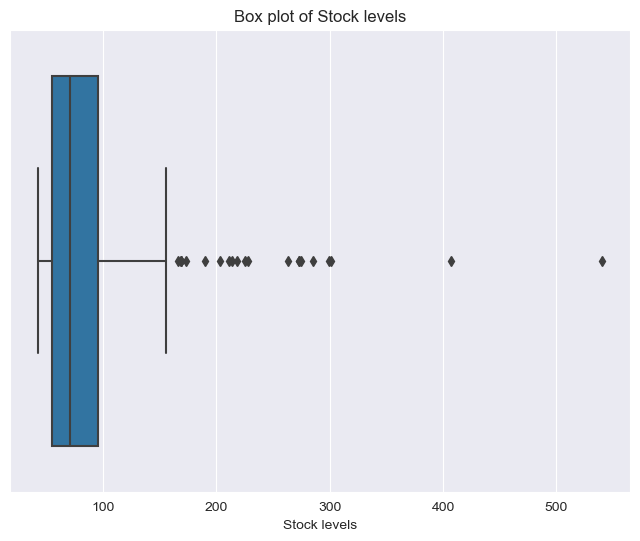

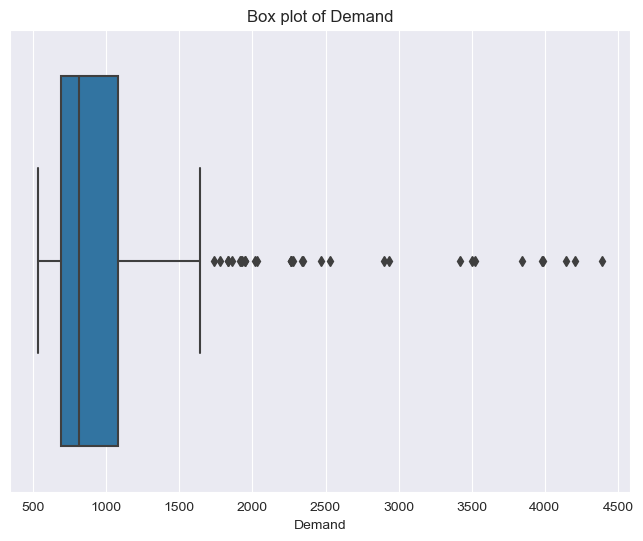

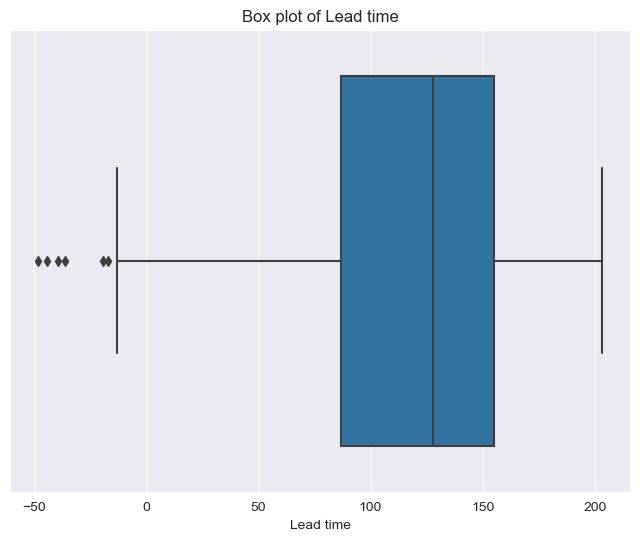

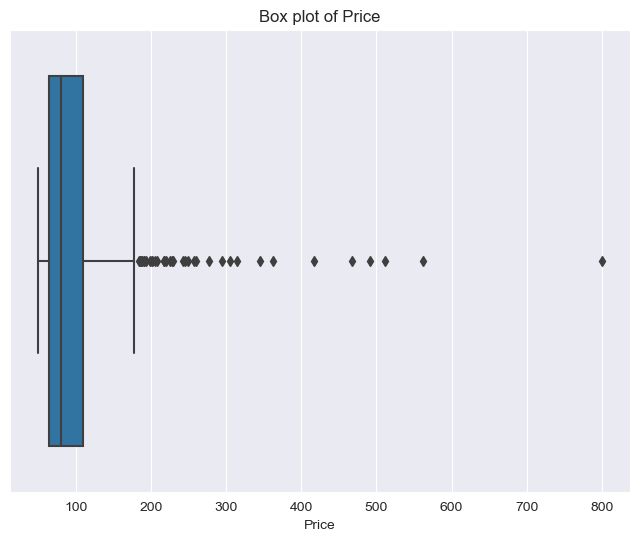

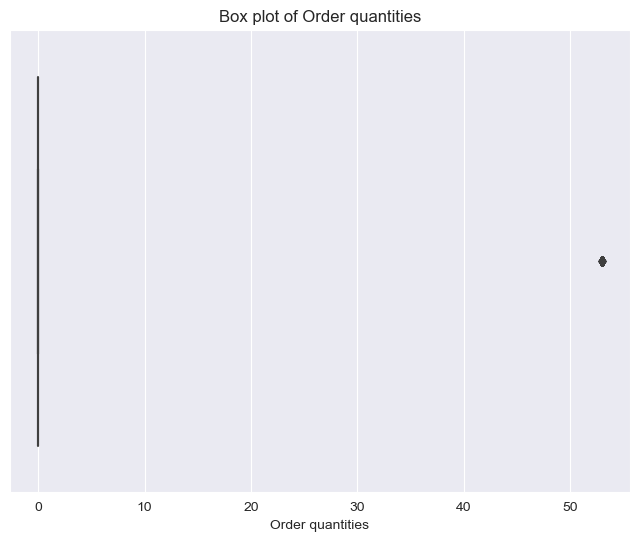

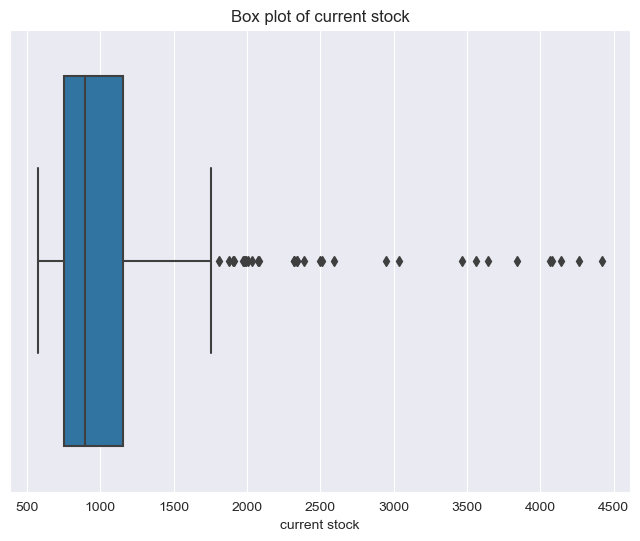

In [35]:
import numpy as np
from scipy.stats import skewnorm

def generate_simulation(distribution_type, data, simulation_days=365):
    """
    Generate a simulation based on specified distribution types and parameters.

    Parameters:
    - distribution_type: Type of distribution ('normal', 'right-skewed', 'left-skewed')
    - data: Actual data to be used for simulation
    - simulation_days: Number of days to simulate

    Returns:
    - List of generated simulated_data
    """
    std = np.std(data)
    mean = np.mean(data)
    simulated_data = []

    for _ in range(simulation_days):
        sample = np.random.normal(0, 1)  # Sample from a standard normal distribution

        # Generate random sample based on distribution type
        if distribution_type == 'normal':
            simulated_sample = sample
        elif distribution_type == 'right-skewed':
            simulated_sample = np.exp(sample) # Apply exponential transformation for right-skewed
        elif distribution_type == 'left-skewed':
            skewness = -5  # Adjust the skewness value as needed
            simulated_sample = skewnorm.rvs(a=skewness, loc=mean, scale=std)  # Generate left-skewed data
        else:
            raise ValueError("Invalid distribution type")
        # Add the simulated sample to the list
        simulated_data.append(simulated_sample)

    # Scale back the simulated data to the original range
    simulated_data = np.round((np.array(simulated_data) * std) + mean).astype(int)

    return simulated_data

# Loop through data_and_distribution_dict and generate simulated data for each column
all_generated_df=pd.DataFrame([])
for column, data in data_and_distribution_dict.items():
    if column == "current stock":
        continue
    data_values = data["data"]
    distribution_type = data["distribution"]
    simulated_data = generate_simulation(distribution_type, data_values)
    df = pd.DataFrame(simulated_data, columns=[column])
    all_generated_df = pd.concat([all_generated_df, df], axis=1)
all_generated_df["current stock"] = all_generated_df.apply(lambda row:get_current_stock(row),axis=1)
display(all_generated_df)
do_data_analysis(all_generated_df)
print(all_generated_df.shape)
#visualize(all_generated_df)
# Set the order quantity policy
order_quantity_policy = round(all_generated_df["Order quantities"].mean())
# number of days to reorder
reorder_days = 5
new_generated_with_order_quantity_policy_df=pd.DataFrame([])
for column, data in data_and_distribution_dict.items():
    if column == "current stock" or column == "Order quantities":
        continue
    data_values = data["data"]
    distribution_type = data["distribution"]
    simulated_data = generate_simulation(distribution_type, data_values)
    df = pd.DataFrame(simulated_data, columns=[column])
    new_generated_with_order_quantity_policy_df = pd.concat([new_generated_with_order_quantity_policy_df, df], axis=1)
# Calculate the order quantities based on the order quantity policy
for i in range(len(new_generated_with_order_quantity_policy_df)):
    if i%reorder_days==0:
        new_generated_with_order_quantity_policy_df.loc[i, "Order quantities"] = order_quantity_policy
    else:
        new_generated_with_order_quantity_policy_df.loc[i, "Order quantities"] = 0

new_generated_with_order_quantity_policy_df["current stock"] = new_generated_with_order_quantity_policy_df.apply(lambda row:get_current_stock(row),axis=1)
display(new_generated_with_order_quantity_policy_df)
do_data_analysis(new_generated_with_order_quantity_policy_df)
print(new_generated_with_order_quantity_policy_df.shape)
visualize(new_generated_with_order_quantity_policy_df)

In [13]:
# # Other excel data
# df = pd.read_excel("./Inventory Data.xlsx",sheet_name=["Past Orders", "Stock"])
# past_orders_df = df["Past Orders"]
# stock_df = df["Stock"]
# # Calculate total order quantity for each SKU
# demand_df = past_orders_df.groupby('SKU ID')['Order Quantity'].sum().reset_index()
# demand_df.columns = ['SKU ID', 'Demand']
# # Merge demand data with the stock data based on SKU ID
# merged_df = pd.merge(stock_df, demand_df, on='SKU ID', how='left')
# # Calculate order quantity based on dynamic current stock
# merged_df['Order Quantity'] = merged_df.apply(lambda row: max(0, row['Demand'] - row['Current Stock Quantity']), axis=1)
# #visualize(merged_df)
# merged_df


,SKU ID,Current Stock Quantity,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Demand,Order Quantity
0,1009AA,7210.0,Kg,30,48,28.76326,86398.0,79188.0
1,1077CA,46516.0,Kg,45,70,22.97770,451826.0,405310.0
2,1083AA,48210.0,Kg,45,68,29.02000,386606.0,338396.0
3,1116CA,33398.0,Kg,90,140,32.80000,425947.0,392549.0
4,1126CA,39270.0,Kg,45,62,32.80000,416080.0,376810.0
...,...,...,...,...,...,...,...,...
298,3579CA,116.0,Kg,120,187,86.65000,200.0,84.0
299,3590BA,145.0,Kg,120,160,115.08500,1579.0,1434.0
300,3610AA,275.0,Kg,120,188,156.16000,582.0,307.0
301,3616CA,331.0,Kg,120,167,433.10000,665.0,334.0
